# Machine Learning Engineer Nanodegree
## Capstone Proposal
Carlos Santillan

May 7, 2021

## Proposal

For the capstone project for the Udacity Machine Learning Nanodegree, I have selected the classification of dog images using Convolutional Neural Networks (CNN).

### Domain Background

Image classification is a common Machine Learning task, for this project we will be using different ML techniques and will compare the results obtained from them.

I will use different techniques to build an image classifier that will determine the breed of the dog.

Dog breed classification is a well tested machine learning.  For example the following paper describes building CNN to classify the breed, in order to help lost dogs be returned to their owners.

https://arxiv.org/pdf/2007.11986.pdf


### Problem Statement

The purpose of this project is to evaluate different machine learning techniques, and compare and constrast them. In order to do this I will use pre trained models, create a cnn from scratch and finally apply transfer learning techniques. 

I will use VGG-16 model pre trained against the ImageNet dataset to build a dog classifer. We will also create a CNN from scratch and train it with the Dog dataset, finally we wil use transfer learning to train a model 

I will use VGG-16 model pre trained against the ImageNet dataset to build a dog classifer. We will also create a CNN from scratch, finally I will use transfer learning to train a model.

### Datasets and Inputs

For this project I will be using the Standford Dog dataset, This dataset consists of 120 different dog breeds with around 150 images per breed for a total of 20,580 images. 
From this dataset I will for each different breed of dogs I will select a balanced subset of :


This is a popular dataset for dog breed classification models used in research. And it is also available on Kaggle Playground Prediction Competition https://www.kaggle.com/c/dog-breed-identification


The original data source is found on http://vision.stanford.edu/aditya86/ImageNetDogs/ 
```
@inproceedings{KhoslaYaoJayadevaprakashFeiFei_FGVC2011,
author = "Aditya Khosla and Nityananda Jayadevaprakash and Bangpeng Yao and
          Li Fei-Fei",
title = "Novel Dataset for Fine-Grained Image Categorization",
booktitle = "First Workshop on Fine-Grained Visual Categorization,
             IEEE Conference on Computer Vision and Pattern Recognition",
year = "2011",
month = "June",
address = "Colorado Springs, CO",
}
@inproceedings{imagenet_cvpr09,
        AUTHOR = {Deng, J. and Dong, W. and Socher, R. and Li, L.-J. and
                  Li, K. and Fei-Fei, L.},
        TITLE = { {ImageNet: A Large-Scale Hierarchical Image Database} },
        BOOKTITLE = {CVPR09},
        YEAR = {2009},
        BIBSOURCE = "http://www.image-net.org/papers/imagenet_cvpr09.bib"}
```

The dataset is also a part of tensorflow datatest: https://www.tensorflow.org/datasets/catalog/stanford_dogs
```
@misc{TFDS,
  title = { {TensorFlow Datasets}, A collection of ready-to-use datasets},
  howpublished = {\url{https://www.tensorflow.org/datasets}},
}
```


### Solution Statement
In this project, I will use use different techniques to solve the problem. I will create a CNN from scratch and
train it with the Dog dataset, finally I wil use transfer learning using ResNet50 and/or Inception to train a
model.

#### Benchmark Model
I will use the VGG-16 model as my benchmark model, the model is capable of identifying 118 dog breeds.


### Evaluation Metrics
This is a simple classification problem, we can use simple classification metrics such as Accuracy




# Load required Libraries

I will be using Tensorflow and Keras 

Additional support libraries 

In [1]:


import datetime,os
import numpy as np


from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions


import cv2




In [2]:
print(tf.__version__)
print(tf.test.is_gpu_available())


gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
tf.config.experimental.set_memory_growth(gpus[0], True)


2.5.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Load dataset from tensorflow datasets
```
The Stanford Dogs dataset contains images of 120 breeds of dogs from around the world. This dataset has been built using images and annotation from ImageNet for the task of fine-grained image categorization. There are 20,580 images, out of which 12,000 are used for training and 8,580 for testing. Class labels and bounding box annotations are provided for all the 12,000 images.

```

For this project I will be using the publicly available dataset standford, provided as a tensorflow Dataset
The dataset has been pre split into a training and test dataset

https://www.oreilly.com/library/view/ai-and-machine/9781492078180/ch04.html

In [3]:
standford_data,info = tfds.load("stanford_dogs",with_info=True,shuffle_files=True,as_supervised=True)

standford_train, standford_test= standford_data["train"], standford_data["test"]

assert isinstance(standford_train, tf.data.Dataset)

In [4]:
print(info)


tfds.core.DatasetInfo(
    name='stanford_dogs',
    full_name='stanford_dogs/0.2.0',
    description="""
    The Stanford Dogs dataset contains images of 120 breeds of dogs from around
    the world. This dataset has been built using images and annotation from
    ImageNet for the task of fine-grained image categorization. There are
    20,580 images, out of which 12,000 are used for training and 8580 for
    testing. Class labels and bounding box annotations are provided
    for all the 12,000 images.
    """,
    homepage='http://vision.stanford.edu/aditya86/ImageNetDogs/main.html',
    data_path='C:\\Users\\carlo\\tensorflow_datasets\\stanford_dogs\\0.2.0',
    download_size=778.12 MiB,
    dataset_size=744.72 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=120),
        'objects': Sequence({
            'bbox':

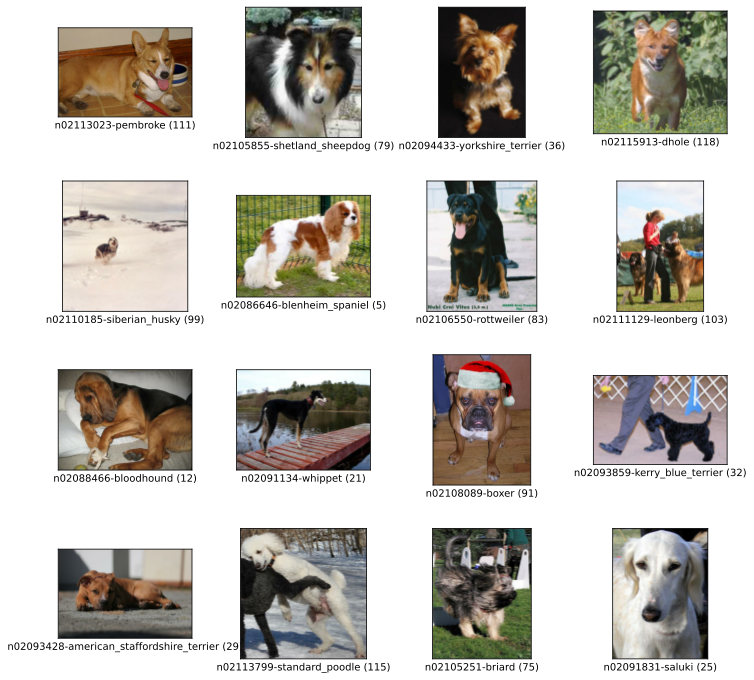

In [5]:
fig = tfds.show_examples(standford_train, info,    rows = 4,   cols =4)

# Reference Model VGG16

Our reference model will be [VGG16](https://neurohive.io/en/popular-networks/vgg16/) model trained with the imagenet dataset,
The [imagenet dataset](https://www.image-net.org/) is a dataset of over 14 million images belonging to 1000 classes. 

VGG16 pretrained weights are downloaded 






In [6]:
base_model_vg=VGG16(weights='imagenet')
base_model_vg.summary()
IMG_SIZE=224

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
def show_image(img):
    plt.imshow(img)
    plt.show()
    
def resize_normalize(image,label):
    image = tf.cast(image,tf.float32)
    image = tf.image.resize(image,(IMG_SIZE,IMG_SIZE))
    image = np.reshape(image,[1,224,224,3])
    
    return image,label

def augmentimages(image):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_contrast(image, lower=0.0, upper=1.0)
    return image

def get_decode_predictions(predict):
    #print(decode_predictions(predict, top=5))
    synset, imagenet_class_name, prob = decode_predictions(predict, top=1)[0][0]
    return synset,imagenet_class_name, prob


match_cnt = 0
miss_cnt = 0
predicted_list=[]
label_list=[]
for example in standford_test.take(-1):
    #print(example)
    X_test, y_test = example[0], example[1]
    y=y_test

    X=resize_normalize(X_test,y)

    predict=base_model_vg.predict(X[0])
    synset,imagenet_class_name, prob = get_decode_predictions(predict)
    label = info.features["label"].int2str(y_test)
    predicted_list.append(synset)
    label_list.append(label.split('-')[0])
    if synset == label.split('-')[0]:
        match_cnt +=1
    else:
        miss_cnt +=1 
    

    
print("Matched :", match_cnt)
print("Missed :", miss_cnt)


Matched : 3377
Missed : 5203


In [8]:
from sklearn.metrics import classification_report, confusion_matrix

## function to get confusion matrix in a proper format
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

    
def report_model(predict_class, test_class):
    print("=== Classification Report ===")
    print(classification_report(test_class, predict_class))
    
report_model(predicted_list,label_list)

=== Classification Report ===
              precision    recall  f1-score   support

   n01484850       0.00      0.00      0.00         0
   n01494475       0.00      0.00      0.00         0
   n01498041       0.00      0.00      0.00         0
   n01514668       0.00      0.00      0.00         0
   n01580077       0.00      0.00      0.00         0
   n01664065       0.00      0.00      0.00         0
   n01665541       0.00      0.00      0.00         0
   n01675722       0.00      0.00      0.00         0
   n01694178       0.00      0.00      0.00         0
   n01695060       0.00      0.00      0.00         0
   n01704323       0.00      0.00      0.00         0
   n01768244       0.00      0.00      0.00         0
   n01817953       0.00      0.00      0.00         0
   n01860187       0.00      0.00      0.00         0
   n01871265       0.00      0.00      0.00         0
   n01873310       0.00      0.00      0.00         0
   n01877812       0.00      0.00      0.00        

D:\anaconda3\envs\tflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda3\envs\tflow\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# VGG16 Performance

The VGG16 pretrained model was able to obtain an acuracy of 39%. 

Additional analysis of classes that the model fails to identify woud be necessary. 

Since VGG16 has 1,000 features may want to use only the dog feature classes. 


## Dataset split

Split the training dataset into training (85%) and validation (15%), create the batched datasets and apply data manipulation required. 



In [9]:
DATASET_SIZE=12000
train_size = int(0.85 * DATASET_SIZE)
val_size = int(0.15 * DATASET_SIZE)

# full_dataset = tf.data.TFRecordDataset(FLAGS.input_file)
standford_train = standford_train.shuffle(1000)
train_dataset = standford_train.take(train_size)
validation_dataset = standford_train.skip(train_size)



In [10]:
batch_size=4

size=(IMG_SIZE,IMG_SIZE)

def scale16(image, label):
    i = image
    i = tf.cast(i, tf.float32)
    i = tf.image.resize(i, size) # resize image to match model 
    label=tf.one_hot(label, 120) # One hot encoding of the labels
    return (i, label)

def batch_set(dataset, batch_size):
    return dataset.map(scale16) \
                  .shuffle(1000) \
                  .batch(batch_size) \
                  .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

def create_batched_datasets(train_dataset,test_dataset,validation_dataset,batch_size = batch_size):
    train = batch_set(train_dataset, batch_size)
    val = batch_set(validation_dataset, batch_size)
    
    test = batch_set(test_dataset, batch_size)
    
    return train,test, val

In [11]:
train, val,test = create_batched_datasets(standford_train,validation_dataset,standford_test)


## Transfer Learning Model

I will be using VGG16 model the weights pretrained against the 'imagenet' dataset 



In [12]:
IMG_SIZE=224
size=(IMG_SIZE,IMG_SIZE)
tl_model_vg=VGG16(weights='imagenet',include_top=False,
                 input_shape=(IMG_SIZE, IMG_SIZE, 3))

tl_model_vg.trainable = False

tl_model_vg.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [13]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])


In [14]:
# custom_model = tf.keras.models.Sequential()

layer = tl_model_vg
# layer.trainable = False

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

x = data_augmentation(inputs)
# Preprocess_input  The images are converted from RGB to BGR, 
# then each color channel is zero-centered with respect to the ImageNet dataset, without scaling.
# this is the same as used in training VGG16
x = preprocess_input(x)  
x = tl_model_vg(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)

# Multi class classification with 120 classes using softmas output layer

outputs = tf.keras.layers.Dense(120, activation = 'softmax')(x)
tl_mode = tf.keras.Model(inputs, outputs)


tl_mode.compile(loss='categorical_crossentropy',
              optimizer='adam',
                metrics=['accuracy'])

tl_mode.summary()



Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 224, 224, 3)       0         
_________________________________________________________________
tf.__operators__.getitem (Sl (None, 224, 224, 3)       0         
_________________________________________________________________
tf.nn.bias_add (TFOpLambda)  (None, 224, 224, 3)       0         
_________________________________________________________________
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d (Gl (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0     

https://towardsdatascience.com/checkpointing-deep-learning-models-in-keras-a652570b8de6

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_file_name="vgg16_1.hdf5"

#  Use checkpoints so that we can continue training in case training is interrupted
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_file_name,
                                                monitor="val_loss",
                                                verbose = 1,
                                                save_best_only = False,
                                                save_weights_only = False,
                                                mode= "auto",
                                                save_freq= "epoch",
                                                options=None)

# early stopping to stop training if model is training is not improving

early = EarlyStopping(monitor='val_accuracy',
                      min_delta=0,
                      patience=40,
                      verbose=1,
                      mode='auto')

# Tensorboard callback
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [16]:


%load_ext tensorboard

In [17]:

%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 5076), started 1 day, 11:32:07 ago. (Use '!kill 5076' to kill it.)

In [18]:

#import os
# if os.path.exists(checkpoint_file_name):
#     print("Loading Checkpoint")
#     custom_model.load_weights(checkpoint_file_name)

history  = tl_mode.fit(train, epochs = 100,validation_data=val,callbacks=[tensorboard_callback,checkpoint,early])



Epoch 1/100
3000/3000 [==============================] - 154s 50ms/step - loss: 7.5794 - accuracy: 0.2260 - val_loss: 2.5481 - val_accuracy: 0.6250

Epoch 00001: saving model to vgg16_1.hdf5
Epoch 2/100
3000/3000 [==============================] - 158s 52ms/step - loss: 4.6910 - accuracy: 0.4077 - val_loss: 1.9442 - val_accuracy: 0.7106

Epoch 00002: saving model to vgg16_1.hdf5
Epoch 3/100
3000/3000 [==============================] - 154s 51ms/step - loss: 4.2721 - accuracy: 0.4725 - val_loss: 2.1574 - val_accuracy: 0.7361

Epoch 00003: saving model to vgg16_1.hdf5
Epoch 4/100
3000/3000 [==============================] - 148s 49ms/step - loss: 4.2409 - accuracy: 0.4897 - val_loss: 1.6283 - val_accuracy: 0.7539

Epoch 00004: saving model to vgg16_1.hdf5
Epoch 5/100
3000/3000 [==============================] - 149s 49ms/step - loss: 4.1227 - accuracy: 0.5135 - val_loss: 1.7033 - val_accuracy: 0.7711

Epoch 00005: saving model to vgg16_1.hdf5
Epoch 6/100
3000/3000 [======================


Epoch 00043: saving model to vgg16_1.hdf5
Epoch 44/100
3000/3000 [==============================] - 143s 47ms/step - loss: 4.4351 - accuracy: 0.6145 - val_loss: 1.5856 - val_accuracy: 0.8317

Epoch 00044: saving model to vgg16_1.hdf5
Epoch 45/100
3000/3000 [==============================] - 142s 47ms/step - loss: 4.4578 - accuracy: 0.6179 - val_loss: 1.4753 - val_accuracy: 0.8450

Epoch 00045: saving model to vgg16_1.hdf5
Epoch 46/100
3000/3000 [==============================] - 142s 47ms/step - loss: 4.4833 - accuracy: 0.6205 - val_loss: 1.3519 - val_accuracy: 0.8572

Epoch 00046: saving model to vgg16_1.hdf5
Epoch 47/100
3000/3000 [==============================] - 143s 47ms/step - loss: 4.5324 - accuracy: 0.6122 - val_loss: 1.6207 - val_accuracy: 0.8372

Epoch 00047: saving model to vgg16_1.hdf5
Epoch 48/100
3000/3000 [==============================] - 146s 48ms/step - loss: 4.5108 - accuracy: 0.6202 - val_loss: 1.4326 - val_accuracy: 0.8583

Epoch 00048: saving model to vgg16_1.hd

3000/3000 [==============================] - 142s 47ms/step - loss: 4.5703 - accuracy: 0.6392 - val_loss: 1.6258 - val_accuracy: 0.8389

Epoch 00086: saving model to vgg16_1.hdf5
Epoch 87/100
3000/3000 [==============================] - 141s 47ms/step - loss: 4.7427 - accuracy: 0.6263 - val_loss: 1.5232 - val_accuracy: 0.8539

Epoch 00087: saving model to vgg16_1.hdf5
Epoch 88/100
3000/3000 [==============================] - 142s 47ms/step - loss: 4.7017 - accuracy: 0.6298 - val_loss: 1.5704 - val_accuracy: 0.8361

Epoch 00088: saving model to vgg16_1.hdf5
Epoch 89/100
3000/3000 [==============================] - 142s 47ms/step - loss: 4.7217 - accuracy: 0.6337 - val_loss: 1.4259 - val_accuracy: 0.8544

Epoch 00089: saving model to vgg16_1.hdf5
Epoch 90/100
3000/3000 [==============================] - 143s 47ms/step - loss: 4.6456 - accuracy: 0.6374 - val_loss: 1.3859 - val_accuracy: 0.8606

Epoch 00090: saving model to vgg16_1.hdf5
Epoch 91/100
3000/3000 [=============================

In [19]:

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()



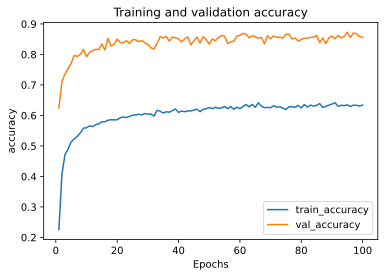

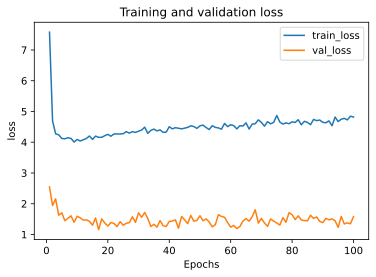

In [20]:
plot_metric(history, 'accuracy')
plot_metric(history, 'loss')

In [21]:
tl_mode.evaluate(val,verbose=2)

450/450 - 19s - loss: 1.4310 - accuracy: 0.8606


[1.4309566020965576, 0.8605555295944214]

In [22]:
tl_mode.evaluate(test,verbose=2)

2145/2145 - 79s - loss: 6.9560 - accuracy: 0.6403


[6.956043720245361, 0.6403263211250305]

# VGG16 Transfer Learning model


After 100 epochs the model was able to obtain a training accuracy of 64% and a validation accuracy of 88%. Evaluating the model against the test dataset shows the model performs at a 65% accuracy.

Additional tuning of the model can be performed also it may be possible to obtain improved results by [fine-tuning](https://www.tensorflow.org/tutorials/images/transfer_learning) the model.

Note: batch size is 4, test dataset size is 2145*4 = 8,580



# Custom Model trained from Scratch

Our final model will be a custom model trained completely from scratch. 

The model is a build a small version of the Xception model. 



https://keras.io/examples/vision/image_classification_from_scratch/



In [23]:
def make_model(input_shape, num_classes):
    
    # Mostly based on Xception model from 
    # https://keras.io/examples/vision/image_classification_from_scratch/
    
    inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
    x = data_augmentation(inputs)
    x = preprocess_input(x)

    x = tf.keras.layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.Conv2D(64, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.Activation("relu")(x)
        x = tf.keras.layers.SeparableConv2D(size, 3, padding="same")(x)
        x = tf.keras.layers.BatchNormalization()(x)

        x = tf.keras.layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = tf.keras.layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = tf.keras.layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = tf.keras.layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation("relu")(x)

    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = tf.keras.layers.Dropout(0.5)(x)
    outputs = tf.keras.layers.Dense(units, activation=activation)(x)
    return tf.keras.Model(inputs, outputs)


a_model = make_model(input_shape=(IMG_SIZE, IMG_SIZE, 3), num_classes=120)

a_model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

a_model.summary()

#keras.utils.plot_model(model, show_shapes=True)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 224, 224, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
tf.__operators__.getitem_1 (Sli (None, 224, 224, 3)  0           sequential[1][0]                 
__________________________________________________________________________________________________
tf.nn.bias_add_1 (TFOpLambda)   (None, 224, 224, 3)  0           tf.__operators__.getitem_1[0][0] 
____________________________________________________________________________________________

In [24]:
checkpoint_file_name2="vgg16_2.hdf5"
checkpoint2 = tf.keras.callbacks.ModelCheckpoint(checkpoint_file_name2,
                                                monitor="val_loss",
                                                verbose = 1,
                                                save_best_only = False,
                                                save_weights_only = False,
                                                mode= "auto",
                                                save_freq= "epoch",
                                                options=None)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback2 = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


early2 = EarlyStopping(monitor='val_accuracy',
                      min_delta=0,
                      patience=40,
                      verbose=1,
                      mode='auto')


if os.path.exists(checkpoint_file_name2):
    print("Loading Checkpoint")
    a_model.load_weights(checkpoint_file_name2)

history2  = a_model.fit(train, epochs = 100,validation_data=test,callbacks=[tensorboard_callback2,checkpoint2,early2])



Epoch 1/100


D:\anaconda3\envs\tflow\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


3000/3000 [==============================] - 264s 87ms/step - loss: 0.0510 - accuracy: 0.0099 - val_loss: 0.0524 - val_accuracy: 0.0075

Epoch 00001: saving model to vgg16_2.hdf5
Epoch 2/100
3000/3000 [==============================] - 263s 87ms/step - loss: 0.0484 - accuracy: 0.0151 - val_loss: 0.0476 - val_accuracy: 0.0266

Epoch 00002: saving model to vgg16_2.hdf5
Epoch 3/100
3000/3000 [==============================] - 263s 87ms/step - loss: 0.0471 - accuracy: 0.0266 - val_loss: 0.0458 - val_accuracy: 0.0390

Epoch 00003: saving model to vgg16_2.hdf5
Epoch 4/100
3000/3000 [==============================] - 261s 87ms/step - loss: 0.0459 - accuracy: 0.0323 - val_loss: 0.0436 - val_accuracy: 0.0441

Epoch 00004: saving model to vgg16_2.hdf5
Epoch 5/100
3000/3000 [==============================] - 261s 87ms/step - loss: 0.0450 - accuracy: 0.0372 - val_loss: 0.0437 - val_accuracy: 0.0500

Epoch 00005: saving model to vgg16_2.hdf5
Epoch 6/100
3000/3000 [==============================] - 

Epoch 44/100
3000/3000 [==============================] - 261s 87ms/step - loss: 0.0205 - accuracy: 0.5582 - val_loss: 0.0254 - val_accuracy: 0.4816

Epoch 00044: saving model to vgg16_2.hdf5
Epoch 45/100
3000/3000 [==============================] - 261s 87ms/step - loss: 0.0201 - accuracy: 0.5635 - val_loss: 0.0239 - val_accuracy: 0.4924

Epoch 00045: saving model to vgg16_2.hdf5
Epoch 46/100
3000/3000 [==============================] - 260s 86ms/step - loss: 0.0198 - accuracy: 0.5748 - val_loss: 0.0267 - val_accuracy: 0.4632

Epoch 00046: saving model to vgg16_2.hdf5
Epoch 47/100
3000/3000 [==============================] - 260s 86ms/step - loss: 0.0195 - accuracy: 0.5794 - val_loss: 0.0260 - val_accuracy: 0.4781

Epoch 00047: saving model to vgg16_2.hdf5
Epoch 48/100
3000/3000 [==============================] - 260s 86ms/step - loss: 0.0193 - accuracy: 0.5908 - val_loss: 0.0285 - val_accuracy: 0.4515

Epoch 00048: saving model to vgg16_2.hdf5
Epoch 49/100
3000/3000 [================


Epoch 00086: saving model to vgg16_2.hdf5
Epoch 87/100
3000/3000 [==============================] - 261s 86ms/step - loss: 0.0116 - accuracy: 0.7753 - val_loss: 0.0297 - val_accuracy: 0.5339

Epoch 00087: saving model to vgg16_2.hdf5
Epoch 88/100
3000/3000 [==============================] - 261s 87ms/step - loss: 0.0115 - accuracy: 0.7753 - val_loss: 0.0299 - val_accuracy: 0.5200

Epoch 00088: saving model to vgg16_2.hdf5
Epoch 89/100
3000/3000 [==============================] - 266s 88ms/step - loss: 0.0115 - accuracy: 0.7807 - val_loss: 0.0268 - val_accuracy: 0.5375

Epoch 00089: saving model to vgg16_2.hdf5
Epoch 90/100
3000/3000 [==============================] - 266s 88ms/step - loss: 0.0112 - accuracy: 0.7883 - val_loss: 0.0318 - val_accuracy: 0.4830

Epoch 00090: saving model to vgg16_2.hdf5
Epoch 91/100
3000/3000 [==============================] - 265s 88ms/step - loss: 0.0112 - accuracy: 0.7883 - val_loss: 0.0292 - val_accuracy: 0.5209

Epoch 00091: saving model to vgg16_2.hd

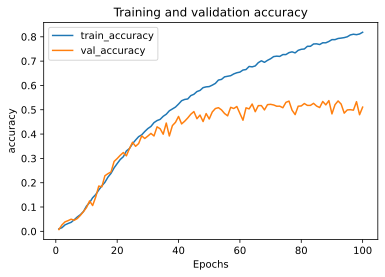

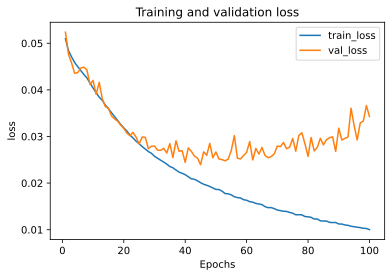

In [25]:
plot_metric(history2, 'accuracy')
plot_metric(history2, 'loss')

In [27]:
a_model.evaluate(val,verbose=1)

450/450 [==============================] - 11s 18ms/step - loss: 0.0088 - accuracy: 0.8672


[0.008801912888884544, 0.867222249507904]

In [26]:
a_model.evaluate(test,verbose=1)

2145/2145 [==============================] - 42s 19ms/step - loss: 0.0343 - accuracy: 0.5107


[0.03429248556494713, 0.5107226371765137]

# Custom Model

After 100 epochs the model was able to obtain a training accuracy of 82% and a validation accuracy of 87%. 
Evaluating the model against the test dataset shows the model performs at a 51% accuracy.

Looking at the training accuracy plot we can see that accuracy curve is still going on an upward trend and has not started to level off 
so it is likely that the training would improve running additional 

Additional hyperparmeter tuning of the model can be performed.





# Conclusion

Using the pretrained model was really easy to use but unfortunately only obtained an accuracy of 39%,  transfer learning was able to get an accuracy of 64% and training was quick. Training the custom model took the longest (about 12 hours for 100 epochs) and the model only reached an accuracy of 51% but it looks like there is additional room to improve. 

Overall it was a very interesting exercise, and I had the opportunity to explore a lot of different image classification options. 

